In [1]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import os

In [13]:
folder = "../benchmark/logs/"
files_higgs = [
    "ho_higgs_coarse_10000.json",
    "ho_higgs_coarse_7500.json",
    "ho_higgs_coarse_5000.json",
]

In [14]:
data_higgs = []
for fn in files_higgs:
    with open(os.path.join(folder, fn), "r") as fh:
        data_higgs.append(json.load(fh))

In [62]:
def plot_hp(data):
    fig, ax = plt.subplots()
    num_iter = len(data['ho'])
    num_hos = len(data['ho'][0]['hparams'])
    time_range = [data['ho'][i]['time'] for i in range(num_iter)]
    
    for h in range(num_hos):
        ax.plot(time_range, [data['ho'][i]['hparams'][h] for i in range(num_iter)])
    ax.set_ylabel("Hyper-parameter values")
    ax.set_xlabel("Time (s)")

    ax2 = ax.twinx()
    ax2.plot(time_range, [data['ho'][i]['val_loss'] for i in range(num_iter)], lw=2, c="k",
             label="Validation loss")
    ax2.plot(time_range[1:], [data['partial_test_errors']['AUC'][i] for i in range(num_iter - 1)],
             lw=2, c='r', linestyle='--', label="Test AUC")
    
    ax2.scatter(time_range[-1], data_higgs[0][-1]['retrain_test_errors']['AUC'], s=90, label="Retrain test AUC")
    
    ax2.legend(loc="best")
    ax2.set_ylabel("Validation loss")
    

<IPython.core.display.Javascript object>


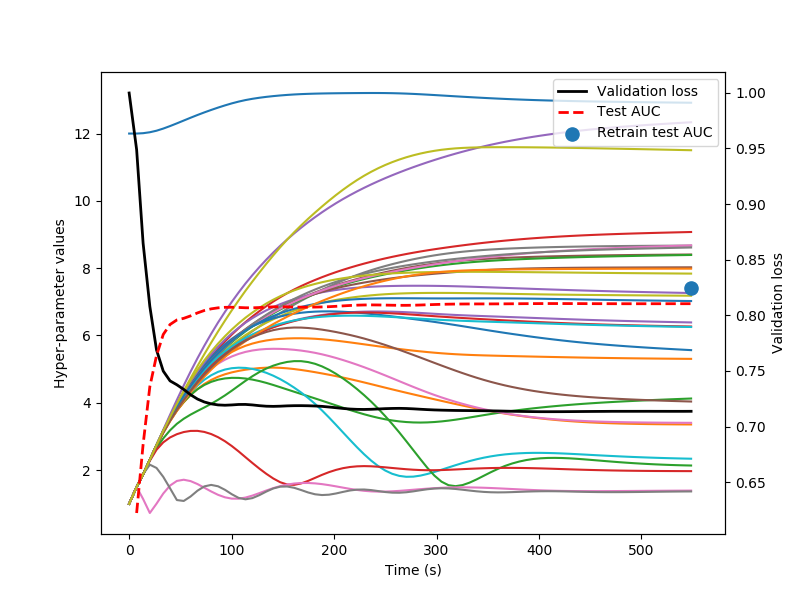

In [64]:
plot_hp(data_higgs[0][-1])

In [63]:
data_higgs[0][-1].keys()

dict_keys(['name', 'timestamp', 'dataset', 'dtype', 'optimizer', 'scheduler', 'seed', 'inner_iter', 'outer_iter', 'outer_lr', 'num_centers', 'data_subsampling', 'cg_tolerance', 'val_fraction', 'hessian_cg_steps', 'retrain_num_centers', 'retrain_iter', 'ho', 'retrain_test_errors', 'partial_test_errors'])

In [42]:
data_higgs[0][-1]['retrain_test_errors']

{'AUC': 0.8244965928784881, 'c-error': 0.25512545454545454}

In [46]:
len(data_higgs[0][-1]['partial_test_errors']['AUC'])

80